## Churn Prediction: A Comparative Study of Machine Learning Models for Customer Retention 

#### Overview:

This project aims to predict customer churn using different machine learning models and selecting the best model that fits well to make predictions. The dataset consists of 9 features:
1. Customer ID
2. Tenure
3. Phone Services
4. Contract
5. Paperless Billing
6. Payment Method
7. Monthly Charges
8. Total Charges
9.  Churn (Target Variable)


#### Objective:

* Predict customer churn using different machine learning models
* Evaluate the performance of each model using accuracy metrics
* Select the best model that fits well to make predictions

#### Methodology:

1. Data Preprocessing: Handle missing values, encode categorical variables, and scale/normalize features
2. Model Development: Train and test the following models:
* Logistic Regression
* Decision Trees
* Random Forest
* Gradient Boosting
3. Model Evaluation: Evaluate the performance of each model using accuracy metric
4. Model Selection: Select the best model based on the evaluation metrics.

#### Expected Outcomes:

* A comparative analysis of the performamnce of different machine learning models for churn prediction
* A recommendation for the best model to use for churn prediction
* A trained model that can be used to make predictions on new,unseen data

#### Dataset: churn dataset gotten from www.kaggle.com

#### Tools and Technologies:

* Python
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scikit-learn

* Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Load Data

In [3]:
df= pd.read_csv("C:/Users/DELL/Desktop/ML DATASET & PYTHON WORKS/churn_data.csv")
df.head(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape

(7042, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.isna().sum().sum()

0

In [10]:
df.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [13]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [15]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
df.describe()

,tenure,MonthlyCharges
count,7042.000000,7042.000000
mean,32.366373,64.755886
std,24.557955,30.088238
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


* Data Preprocessing

In [18]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'],errors='coerce')

In [19]:

df['TotalCharges']= df['TotalCharges'].fillna(df['TotalCharges'].mean())

* Explorartory Data Analysis

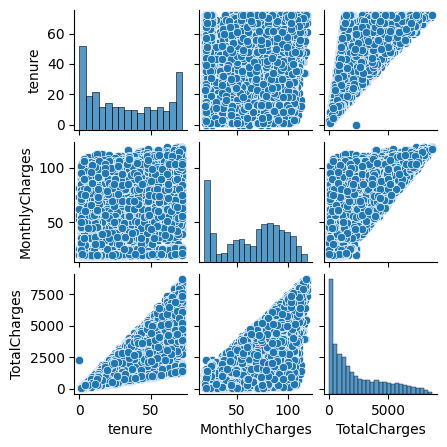

In [20]:
sns.pairplot(data=df,height=1.5)
plt.show()

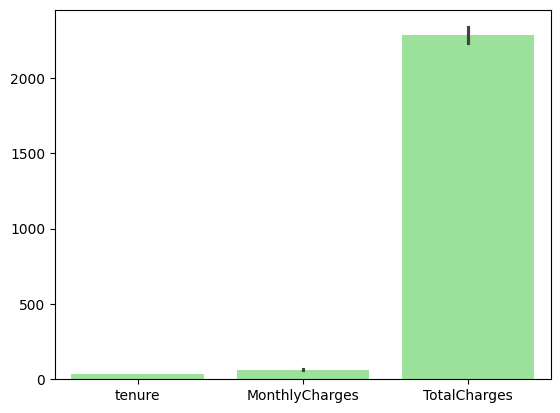

In [21]:
sns.barplot(df,color='Lightgreen')
plt.show()

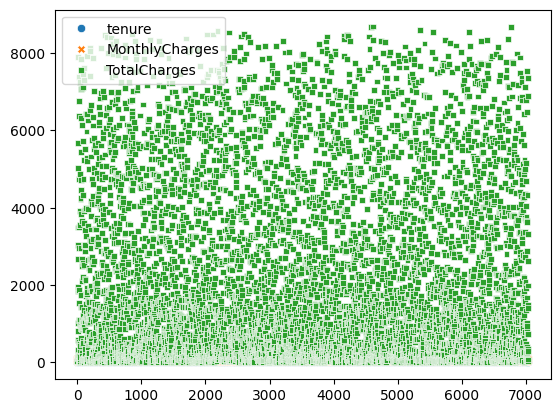

In [22]:
sns.scatterplot(df)
plt.show()

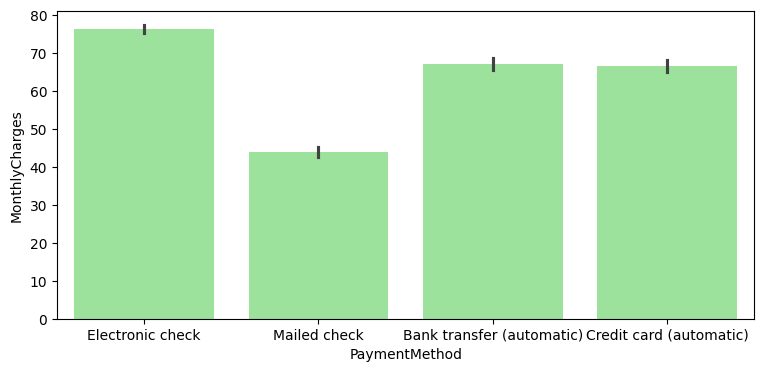

In [23]:
plt.figure(figsize=(9,4))
sns.barplot(x='PaymentMethod',y='MonthlyCharges',data=df,color='lightgreen')
plt.show()

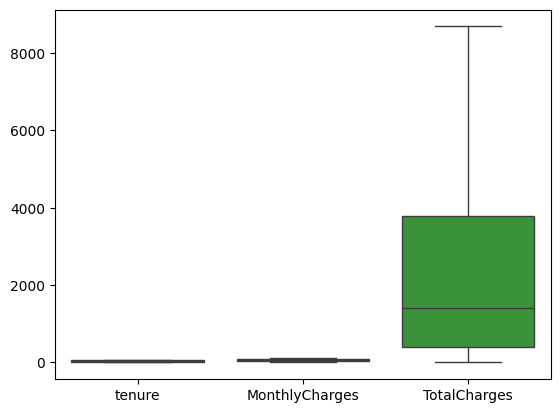

In [24]:
sns.boxplot(df)
plt.show()

#### Feature Engineering

* Encoding categorical datas

In [25]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df['customerID']=Le.fit_transform(df['customerID'])
df['PhoneService']=Le.fit_transform(df['PhoneService'])
df['Contract']=Le.fit_transform(df['Contract'])
df['PaperlessBilling']=Le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=Le.fit_transform(df['PaymentMethod'])
df['Churn']=Le.fit_transform(df['Churn'])

In [26]:
df.head(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5374,1,0,0,1,2,29.85,29.85,0
1,3961,34,1,1,0,3,56.95,1889.50,0
2,2563,2,1,0,1,3,53.85,108.15,1
3,5534,45,0,1,0,0,42.30,1840.75,0
4,6510,2,1,0,1,2,70.70,151.65,1


In [27]:
df.tail(10)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7032,4892,1,1,0,1,2,75.75,75.75,1
7033,6874,38,1,0,1,1,69.50,2625.25,0
7034,437,67,1,0,1,1,102.95,6886.25,1
7035,5994,19,1,0,1,0,78.70,1495.10,0
7036,5503,12,0,1,0,2,60.65,743.30,0
7037,1758,72,1,2,1,0,21.15,1419.40,0
7038,4852,24,1,1,1,3,84.80,1990.50,0
7039,1525,72,1,1,1,1,103.20,7362.90,0
7040,3366,11,0,0,1,2,29.60,346.45,0
7041,5933,4,1,0,1,3,74.40,306.60,1


* Scaling Predictors

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[['customerID','tenure',
     'PhoneService','Contract',
     'PaperlessBilling','PaymentMethod',
     'MonthlyCharges', 'TotalCharges']]=sc.fit_transform(df[['customerID','tenure',
                                                             'PhoneService','Contract',
                                                             'PaperlessBilling','PaymentMethod',
                                                             'MonthlyCharges','TotalCharges']])

* Collinearity Check

In [29]:
correlation=df.corrwith(df['Churn'])
print(correlation)

customerID         -0.017504
tenure             -0.352168
PhoneService        0.011970
Contract           -0.396658
PaperlessBilling    0.191910
PaymentMethod       0.106955
MonthlyCharges      0.193503
TotalCharges       -0.199318
Churn               1.000000
dtype: float64


* Defining Features

In [30]:
sc_x= df[['tenure','PhoneService',
          'Contract','PaperlessBilling',
          'PaymentMethod','MonthlyCharges',
          'TotalCharges']]
sc_y= df['Churn']

* Splitting and Training data

In [31]:
from sklearn.model_selection import train_test_split
sc_x_train,sc_x_test,sc_y_train,sc_y_test=train_test_split(sc_x,sc_y,test_size=0.2,random_state=42)

#### Model Selection

* Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report,confusion_matrix
Lr=LogisticRegression()
Lr.fit(sc_x_train,sc_y_train)


LogisticRegression()

* Model Evaluation

In [33]:
prediction=Lr.predict(sc_x_train)
accuracy_train= accuracy_score(sc_y_train,prediction)
model_test=Lr.predict(sc_x_test)
accuracy_test= accuracy_score(sc_y_test,model_test)
score= Lr.score(sc_x,sc_y)
print("Accuracy on Taining data: ",accuracy_train)
print("Accuracy on Testing data:",accuracy_test)
print("Model score:",score)


Accuracy on Taining data:  0.7931830285815729
Accuracy on Testing data: 0.8005677785663591
Model score: 0.7946606077818802


* Decision Trees

In [34]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(sc_x_train,sc_y_train)

DecisionTreeClassifier()

* Model Evaluation

In [35]:
prediction=dc.predict(sc_x_train)
accuracy_train= accuracy_score(sc_y_train,prediction)
model_test=dc.predict(sc_x_test)
accuracy_test= accuracy_score(sc_y_test,model_test)
score= dc.score(sc_x,sc_y)
print("Accuracy on Taining data: ",accuracy_train)
print("Accuracy on Testing data:",accuracy_test)
print("Model score:",score)

Accuracy on Taining data:  0.9959169181608379
Accuracy on Testing data: 0.7182398864442867
Model score: 0.9403578528827038


* Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(sc_x_train,sc_y_train)



RandomForestClassifier()

* Model Evaluation

In [37]:
prediction=rf.predict(sc_x_train)
accuracy_train= accuracy_score(sc_y_train,prediction)
model_test=rf.predict(sc_x_test)
accuracy_test= accuracy_score(sc_y_test,model_test)
score= rf.score(sc_x,sc_y)
print("Accuracy on Taining data: ",accuracy_train)
print("Accuracy on Testing data:",accuracy_test)
print("Model score:",score)

Accuracy on Taining data:  0.9959169181608379
Accuracy on Testing data: 0.7686302342086586
Model score: 0.9504402158477705


* Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(sc_x_train,sc_y_train)

GradientBoostingClassifier()

* Model Evaluation

In [39]:
prediction=gb.predict(sc_x_train)
accuracy_train= accuracy_score(sc_y_train,prediction)
model_test=gb.predict(sc_x_test)
accuracy_test= accuracy_score(sc_y_test,model_test)
score= gb.score(sc_x,sc_y)
print("Accuracy on Taining data: ",accuracy_train)
print("Accuracy on Testing data:",accuracy_test)
print("Model score:",score)

Accuracy on Taining data:  0.8215870761583526
Accuracy on Testing data: 0.808374733853797
Model score: 0.8189434819653507


####  Model Prediction

* Making predictions on the Test data using Random Forest Algorithm

In [40]:
data= pd.DataFrame({'tenure': [-1.155161],'PhoneService': [0.327464],
                          'Contract':[-0.828070],'PaperlessBilling':[0.829897],
                          'PaymentMethod': [1.334764],'MonthlyCharges':[0.320550],
                          'TotalCharges':[-0.872680]})
output=rf.predict(data)
print("Prediction:",output)
if output==1:
    print("Yes")
else:
    print("No")

Prediction: [1]
Yes


* Accuracy Comparison:

1. Logistic Regression: 0.7947
2. Decision Trees: 0.9419
3. Gradient Boosting: 0.8189
4. Random Forest: 0.9510

#### Recommendation:

Based on the accuracy comparison Random Forest outperforms the other models with an accuracy score of 0.9510. While Gradient Boosting and Decision Trees also performed well,Random Forest's superiror accuracy makes it the best choice for prediction.

#### Conclusion:

if accuracy is to be considered as a top prority, Random Forest is the best choice for churn prediction. it's abiliity to accurately identify churners and non churners makes it an ideal choice for business seeking to reduce customer churn and imporve retention rates.

Project done by: Jones Osele

email: oselejones@gmail.com